# Evaluation Project 8 : RainFall Weather Forecasting

### Problem Statement

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

- Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
- Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


### DataSet Description

- Date  - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

##### IMPORTING REQUIRED LIBARIES FOR EDA, DATA CLEANING AND WRANGLING

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import codecs
import joblib
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

IMPORTING CSV FILE TO JUPYTER NOTEBOOK

In [2]:
r_df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
r_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
print('Number of Rows : ',r_df.shape[0])
print('Number of Columns : ',r_df.shape[1])

Number of Rows :  8425
Number of Columns :  23


In [5]:
r_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
r_df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
r_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

- The Date column needs converted to a datetime datatype
- The datatypes for all other columns look good as is
- There appears to be a large number of missing values across multiple columns

In [9]:
round(r_df.isna().sum() / len(r_df), 3)

Date             0.000
Location         0.000
MinTemp          0.009
MaxTemp          0.007
Rainfall         0.028
Evaporation      0.417
Sunshine         0.474
WindGustDir      0.118
WindGustSpeed    0.118
WindDir9am       0.098
WindDir3pm       0.037
WindSpeed9am     0.009
WindSpeed3pm     0.013
Humidity9am      0.007
Humidity3pm      0.012
Pressure9am      0.155
Pressure3pm      0.156
Cloud9am         0.287
Cloud3pm         0.291
Temp9am          0.007
Temp3pm          0.011
RainToday        0.028
RainTomorrow     0.028
dtype: float64

- Evaporation, Sunshine, Cloud9am, and Cloud3pm are all missing more than 35% of their values
- Aside from Date and Location, all columns are missing at least some values
- These missing values can be handled by either dropping certain columns/rows, imputing the values, or a mix of both

In [11]:
r_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


- Multiple columns have clear outliers (e.g., the max Rainfall value is 371.0 despite the 75th percentile being 0.8)
- Not seeing any values that are immediate cause for concern (such as a negative value for minimum Rainfall)

In [12]:
for col in r_df.columns:
    print('\n')
    print(col)
    print('-'*15)
    print(r_df[col].value_counts(normalize=True).head())



Date
---------------
Date
2011-01-31    0.000593
2011-05-08    0.000593
2011-05-21    0.000593
2011-05-20    0.000593
2011-05-19    0.000593
Name: proportion, dtype: float64


Location
---------------
Location
Melbourne       0.192522
Williamtown     0.145994
PerthAirport    0.142908
Albury          0.107656
Newcastle       0.097567
Name: proportion, dtype: float64


MinTemp
---------------
MinTemp
12.0    0.008862
13.2    0.008503
13.8    0.008263
12.7    0.008144
16.4    0.008024
Name: proportion, dtype: float64


MaxTemp
---------------
MaxTemp
19.0    0.010400
23.8    0.008966
19.8    0.008846
25.0    0.008488
22.0    0.008129
Name: proportion, dtype: float64


Rainfall
---------------
Rainfall
0.0    0.647404
0.2    0.049603
0.4    0.021625
0.6    0.014172
1.2    0.010507
Name: proportion, dtype: float64


Evaporation
---------------
Evaporation
4.0    0.036637
3.0    0.033177
2.4    0.029921
2.2    0.029717
2.6    0.029106
Name: proportion, dtype: float64


Sunshine
-----------

- The value counts of the Date column need further explored on a non-normalized basis
- There's a disconnect between the Rainfall value counts and the RainToday / RainTomorrow value counts. While roughly 64% of observations had a value of 0 for Rainfall, about 77.5% of days did not have rainfall according to the latter two columns. This discrepency is likely due to differences in the number of missing values for each column
- The RainToday and RainTomorrow columns should be converted to 0s and 1s for easier manipulation

In [14]:
r_df.Date.value_counts()

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64

In [15]:
r_df.Location.nunique()

12

In [16]:
r_df.RainToday = r_df.RainToday.map({'No': 0, 'Yes': 1})
r_df.RainToday.value_counts(normalize=True)

RainToday
0.0    0.756872
1.0    0.243128
Name: proportion, dtype: float64

In [17]:
r_df.RainTomorrow = r_df.RainTomorrow.map({'No': 0, 'Yes': 1})
r_df.RainTomorrow.value_counts(normalize=True)

RainTomorrow
0.0    0.75678
1.0    0.24322
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Histograms of Columns')

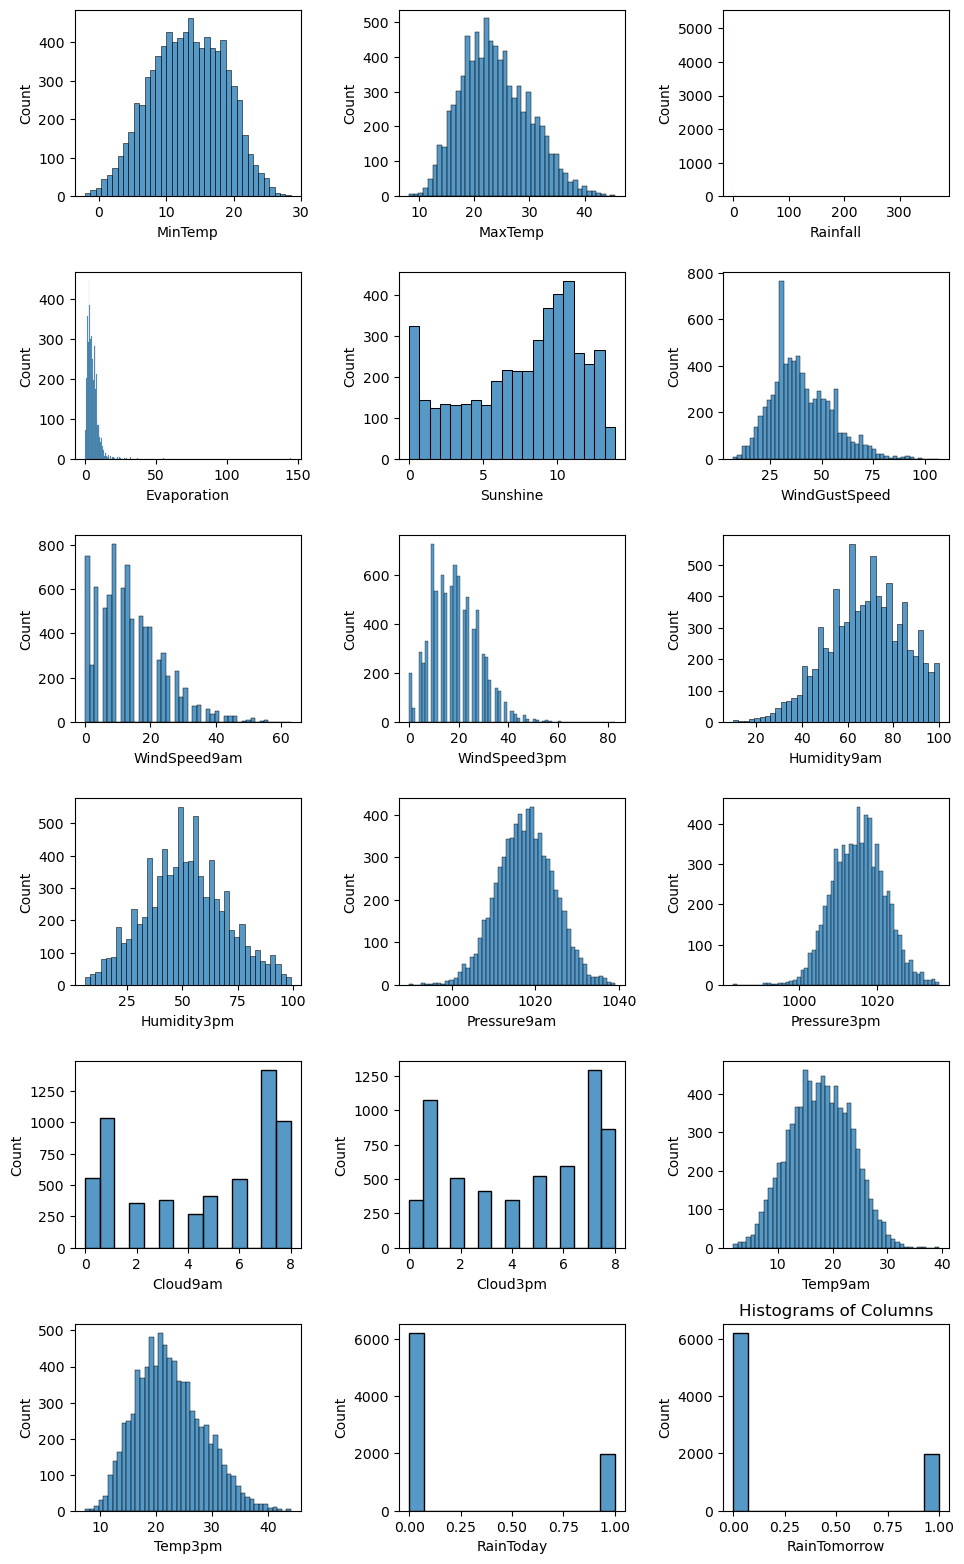

In [20]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(10, 16))
axes = axes.reshape(-1)

continuous = [col for col in r_df.columns if r_df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(r_df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns')

- Most features are normally distributed as expected
- The Rainfall distribution needs further investigation as the large outlier is likely affecting the ability to plot the data
- The Sunshine distribution is interesting but largely explainable:
   - The high frequency of 0 values represents days where it is overcast all day
   - The abrupt decline in frequency after around 11 hours is a reflection of the limited number of days of the year where it is light out for that many hours or longer
- The Humidity9am distribution is particularly interesting due to the large spike in frequencies near 100%

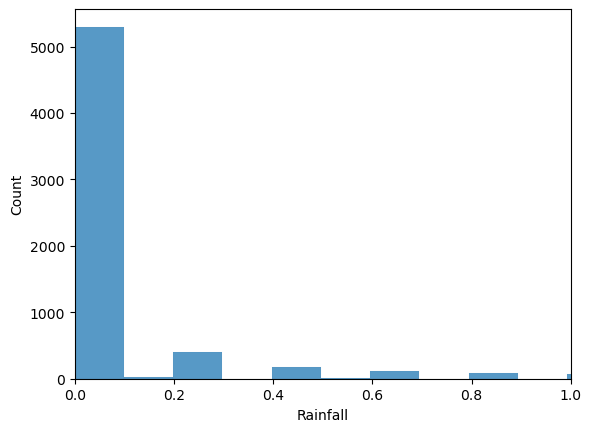

In [22]:
sns.histplot(r_df.Rainfall)
plt.xlim(0, 1);

### Rainy Days by Location

In [23]:
r_df_rain_by_loc = r_df.groupby(by='Location').sum()
r_df_rain_by_loc = r_df_rain_by_loc[['RainToday']]
r_df_rain_by_loc.head()

,RainToday
Location,
Adelaide,44.0
Albury,199.0
Brisbane,135.0
CoffsHarbour,187.0
Darwin,33.0


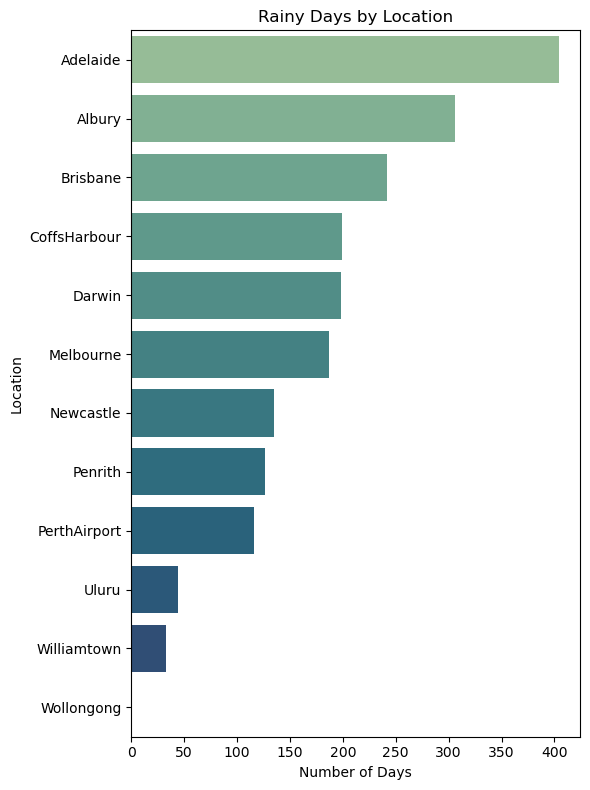

In [26]:
plt.figure(figsize=(6, 8))
sns.barplot(x='RainToday', 
            y=r_df_rain_by_loc.index, 
            data=r_df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h',
            palette='crest'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()

In [27]:
r_df.Location.value_counts()

Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64

### Seasonality

Rainfall exhibits seasonality in many areas of the world. Through grouping the data by month of the year, the percentage of days that it rains in a given month can be easily calculated. Any sort of trend would indicate that the month of the year is a valuable piece of information for modeling purposes.

In [32]:
r_df_seasonality = r_df.copy()
r_df_seasonality['month'] = r_df_seasonality.Date.apply(lambda x: int(str(x)[5:7]))
r_df_seasonality[['Date', 'month']].head()

,Date,month
0,2008-12-01,12
1,2008-12-02,12
2,2008-12-03,12
3,2008-12-04,12
4,2008-12-05,12


In [ ]:
r_df_seasonality_grouped = r_df_seasonality.groupby('month').mean()
r_df_seasonality_grouped[['RainToday']]

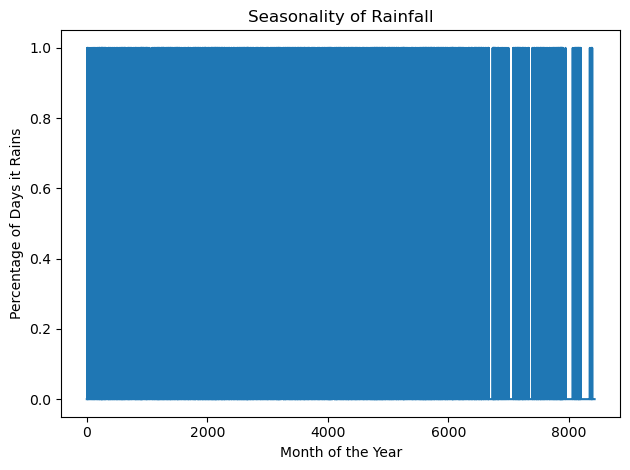

In [33]:
sns.lineplot(data=r_df_seasonality, x=r_df_seasonality.index, y='RainToday')
plt.title('Seasonality of Rainfall')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Days it Rains')
plt.tight_layout()

### Statistical Matrix

<Axes: >

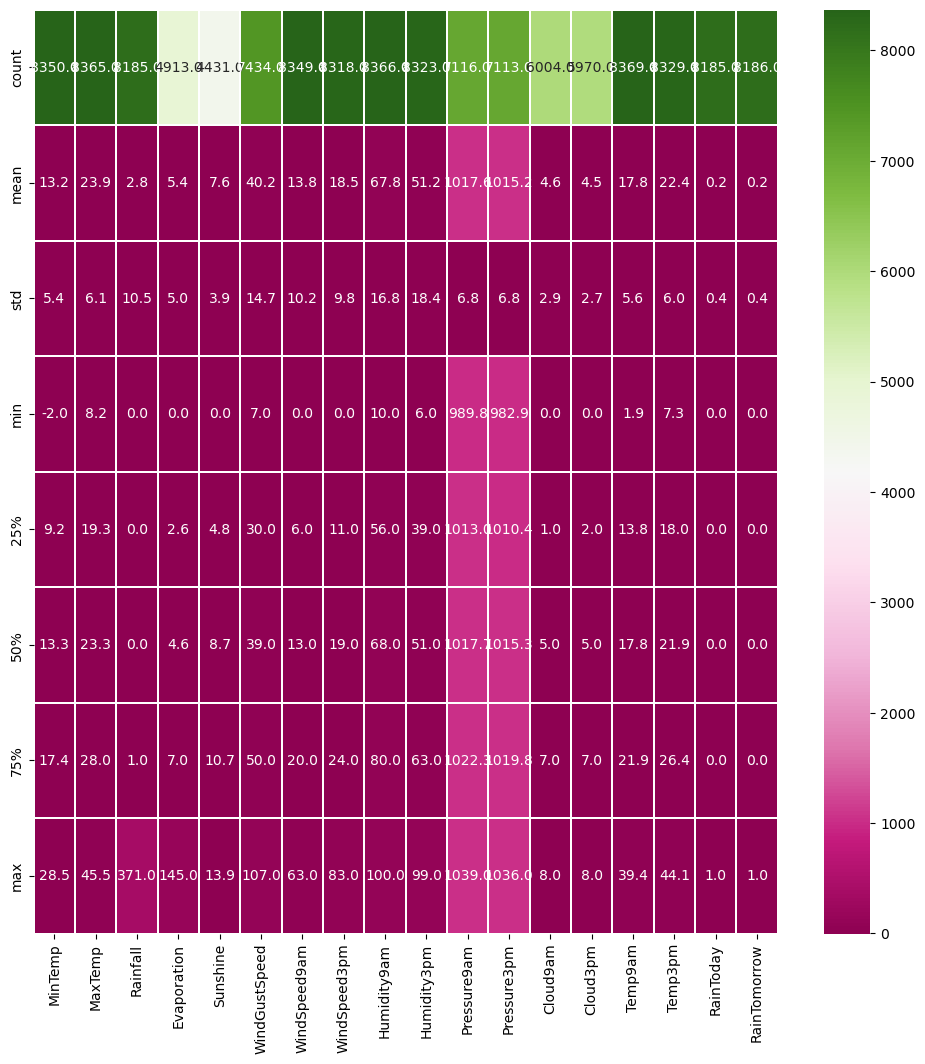

In [40]:
plt.figure(figsize=(12,12))
sns.heatmap(r_df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

### Correlation Matrix

In [ ]:
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')

mask = np.triu(np.ones_like(r_df.corr()))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(r_df.corr(), mask=mask, annot=True, fmt='.2f', square=True, cmap=cmap)
plt.tight_layout()

### Checking Missing Values

In [45]:
r_df_imputed = r_df.dropna(axis=0, subset=['RainTomorrow'])
r_df_imputed.isna().sum()

Date                0
Location            0
MinTemp            60
MaxTemp            35
Rainfall          107
Evaporation      3419
Sunshine         3880
WindGustDir       953
WindGustSpeed     953
WindDir9am        809
WindDir3pm        286
WindSpeed9am       62
WindSpeed3pm       86
Humidity9am        44
Humidity3pm        83
Pressure9am      1292
Pressure3pm      1293
Cloud9am         2291
Cloud3pm         2331
Temp9am            41
Temp3pm            77
RainToday         107
RainTomorrow        0
dtype: int64

### Continuous Features

In [46]:
cont_feats = [col for col in r_df_imputed.columns if r_df_imputed[col].dtype != object]
cont_feats.remove('RainTomorrow')
cont_feats

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [47]:
imputer = IterativeImputer(random_state=42)
r_df_imputed_cont = imputer.fit_transform(r_df_imputed[cont_feats])
r_df_imputed_cont = pd.DataFrame(r_df_imputed_cont, columns=cont_feats)
r_df_imputed_cont.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,5.118398,16.9,21.8,0.0
1,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,1.023826,1.617162,17.2,24.3,0.0
2,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,2.121845,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.446574,1.046166,18.1,26.5,0.0
4,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [48]:
r_df_imputed_cont.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

### Categorical Features

In [49]:
cat_feats = [col for col in r_df_imputed.columns if col not in cont_feats]
cat_feats.remove('RainTomorrow')

cat_feats.remove('Date')
cat_feats.remove('Location')
cat_feats

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [ ]:
r_df_imputed_cat = r_df_imputed[cat_feats]

for col in r_df_imputed_cat.columns:
    values = r_df_imputed_cat.WindDir3pm.value_counts().reset_index()['index'].values
    probs = r_df_imputed_cat[col].value_counts(normalize=True).values
    r_df_imputed_cat[col].replace(np.nan, np.random.choice(a=values, p=probs), inplace=True)

r_df_imputed_cat.head()

In [51]:
r_df_imputed_cat.isna().sum()

WindGustDir    953
WindDir9am     809
WindDir3pm     286
dtype: int64

### Concatenating

In [52]:
r_df_date_loc = r_df_imputed[['Date', 'Location']]
r_df_target = r_df_imputed.RainTomorrow

print(r_df_date_loc.shape)
print(r_df_imputed_cont.shape)
print(r_df_imputed_cat.shape)
print(r_df_target.shape)

(8186, 2)
(8186, 17)
(8186, 3)
(8186,)


In [53]:
r_df_imputed_final = pd.concat(objs=[r_df_date_loc.reset_index(drop=True), 
                                   r_df_imputed_cont.reset_index(drop=True), 
                                   r_df_imputed_cat.reset_index(drop=True), 
                                   r_df_target.reset_index(drop=True)
                                  ], 
                             axis=1
                            )
r_df_imputed_final.shape

(8186, 23)

In [54]:
r_df_imputed_final.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,...,1007.1,8.000000,5.118398,16.9,21.8,0.0,W,W,WNW,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,...,1007.8,1.023826,1.617162,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,...,1008.7,2.121845,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,...,1012.8,0.446574,1.046166,18.1,26.5,0.0,NE,SE,E,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


In [55]:
r_df_imputed_final.isna().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustSpeed      0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday          0
WindGustDir      953
WindDir9am       809
WindDir3pm       286
RainTomorrow       0
dtype: int64

In [56]:
r_df_month = r_df_imputed_final.copy()
r_df_month.insert(1, 'Month', r_df_month.Date.apply(lambda x: int(str(x)[5:7])))
r_df_month.drop(columns='Date', inplace=True)
r_df_month.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,12,Albury,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,...,1007.1,8.000000,5.118398,16.9,21.8,0.0,W,W,WNW,0.0
1,12,Albury,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,...,1007.8,1.023826,1.617162,17.2,24.3,0.0,WNW,NNW,WSW,0.0
2,12,Albury,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,...,1008.7,2.121845,2.000000,21.0,23.2,0.0,WSW,W,WSW,0.0
3,12,Albury,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,...,1012.8,0.446574,1.046166,18.1,26.5,0.0,NE,SE,E,0.0
4,12,Albury,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,W,ENE,NW,0.0


### Dummy Variables

In [57]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
r_df_dummies = pd.get_dummies(r_df_month, columns=categoricals)
r_df_dummies.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,5.462407,6.498250,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,False,False,True,False
1,7.4,25.1,0.0,5.932122,12.420220,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,False,False,True
2,12.9,25.7,0.0,7.357765,11.759469,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,False,False,True
3,9.2,28.0,0.0,5.323681,12.875563,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,False,False
4,17.5,32.3,1.0,5.458007,6.284260,41.0,7.0,20.0,82.0,33.0,...,False,True,False,False,False,False,False,False,False,False


In [58]:
r_df_dummies.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Location_Adelaide',
       'Location_Albury', 'Location_Brisbane', 'Location_CoffsHarbour',
       'Location_Darwin', 'Location_Melbourne', 'Location_Newcastle',
       'Location_Penrith', 'Location_PerthAirport', 'Location_Uluru',
       'Location_Williamtown', 'Location_Wollongong', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGust

### Modeling

In [59]:
r_df_final = r_df_dummies.copy()
X = r_df_final.drop(columns='RainTomorrow')
y = r_df_final.RainTomorrow

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print('Train size:', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size: 6139
Test size:  2047


## Logistic Regression

### Baseline

In [64]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([0., 1., 1., ..., 0., 0., 0.])

In [74]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    confusion_matrix(model, X_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()

def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, X_test, y_test)
    print('\n') 
    
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, X_test, y_test)
    print('\n')
    
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')


### Correcting Class Imbalance

In [67]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

print('Original')
print('-'*20)
print(y_train.value_counts())
print('\n')
print('SMOTE')
print('-'*20)
print(pd.Series(y_train_resampled).value_counts())

Original
--------------------
RainTomorrow
0.0    4636
1.0    1503
Name: count, dtype: int64


SMOTE
--------------------
RainTomorrow
0.0    4636
1.0    4636
Name: count, dtype: int64


In [68]:
logreg_smote = LogisticRegression(random_state=42)
logreg_smote.fit(X_train_resampled, y_train_resampled)
y_pred_smote = logreg_smote.predict(X_test)
y_pred_smote

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
evaluate(logreg_smote, X_train=X_train_resampled, y_train=y_train_resampled, y_pred=y_pred_smote)

### Hyperparameter Tuning

In [76]:
logreg_params = {
    'C': [1, 1e8, 1e16],
    'fit_intercept': [True, False],
    'max_iter': [50, 100, 150],
    'random_state': [42]
}

logreg_gs = GridSearchCV(logreg, logreg_params, scoring='accuracy', cv=3)
logreg_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 100000000.0, 1e+16],
                         'fit_intercept': [True, False],
                         'max_iter': [50, 100, 150], 'random_state': [42]},
             scoring='accuracy')

In [ ]:
joblib.dump(logreg_gs, 'saved_models/logreg_gs.joblib')

In [ ]:
logreg_gs = joblib.load('saved_models/logreg_gs.joblib')

In [ ]:
logreg_gs.best_params_

In [ ]:
round(logreg_gs.best_score_, 4)

In [ ]:
y_pred_logreg_gs = logreg_gs.predict(X_test)
y_pred_logreg_gs

In [ ]:
evaluate(logreg_gs, y_pred=y_pred_logreg_gs)

### Decision Tree

#### Baseline

In [88]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
y_pred_tree

array([1., 0., 1., ..., 1., 0., 0.])

In [ ]:
evaluate(clf, y_pred=y_pred_tree)

### Hyperparameter Tuning

In [90]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

clf_gs = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=3)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [42]},
             scoring='accuracy')

In [ ]:
joblib.dump(clf_gs, 'saved_models/clf_gs.joblib')

In [ ]:
clf_gs = joblib.load('saved_models/clf_gs.joblib')

In [ ]:
clf_gs.best_params_

In [ ]:
round(clf_gs.best_score_, 4)

In [ ]:
y_pred_tree_gs = clf_gs.best_estimator_.predict(X_test)
y_pred_tree_gs

In [ ]:
evaluate(clf_gs.best_estimator_, y_pred=y_pred_tree_gs)

### Random Forest

#### BaseLine

In [92]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0., 0., 1., ..., 1., 0., 0.])

In [ ]:
evaluate(rf, y_pred=y_pred_rf)

### Hyperparameter Tuning

In [93]:
rf_params = {
    'n_estimators': [10, 35, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

rf_gs = GridSearchCV(rf, param_grid=rf_params, scoring='accuracy', cv=3)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 35, 100], 'random_state': [42]},
             scoring='accuracy')

In [ ]:
joblib.dump(rf_gs, 'saved_models/rf_gs.joblib')

In [ ]:
rf_gs = joblib.load('saved_models/rf_gs.joblib')

In [ ]:
rf_gs.best_params_

In [ ]:
round(rf_gs.best_score_, 4)

In [ ]:
y_pred_rf_gs = rf_gs.predict(X_test)
y_pred_rf_gs

In [ ]:
evaluate(rf_gs, y_pred=y_pred_rf_gs)

### XGBoost

#### Baseline

In [95]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
evaluate(xgb, y_pred=y_pred_xgb)

### Hyperparameter Tuning

In [96]:
xgb_params = {
    'n_estimators': [10, 35, 100],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.25]
}

xgb_gs = GridSearchCV(xgb, xgb_params, scoring='accuracy', cv=3)
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.25],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [10, 35, 100]},
             scoring='accuracy')

In [ ]:
joblib.dump(xgb_gs, 'saved_models/xgb_gs.joblib')

In [ ]:
xgb_gs = joblib.load('saved_models/xgb_gs.joblib')

In [ ]:
xgb_gs.best_params_

In [ ]:
round(xgb_gs.best_score_, 4)

In [ ]:
y_pred_xgb_gs = xgb_gs.predict(X_test)
y_pred_xgb_gs

In [ ]:
evaluate(xgb_gs, y_pred=y_pred_xgb_gs)

### Feature Importance

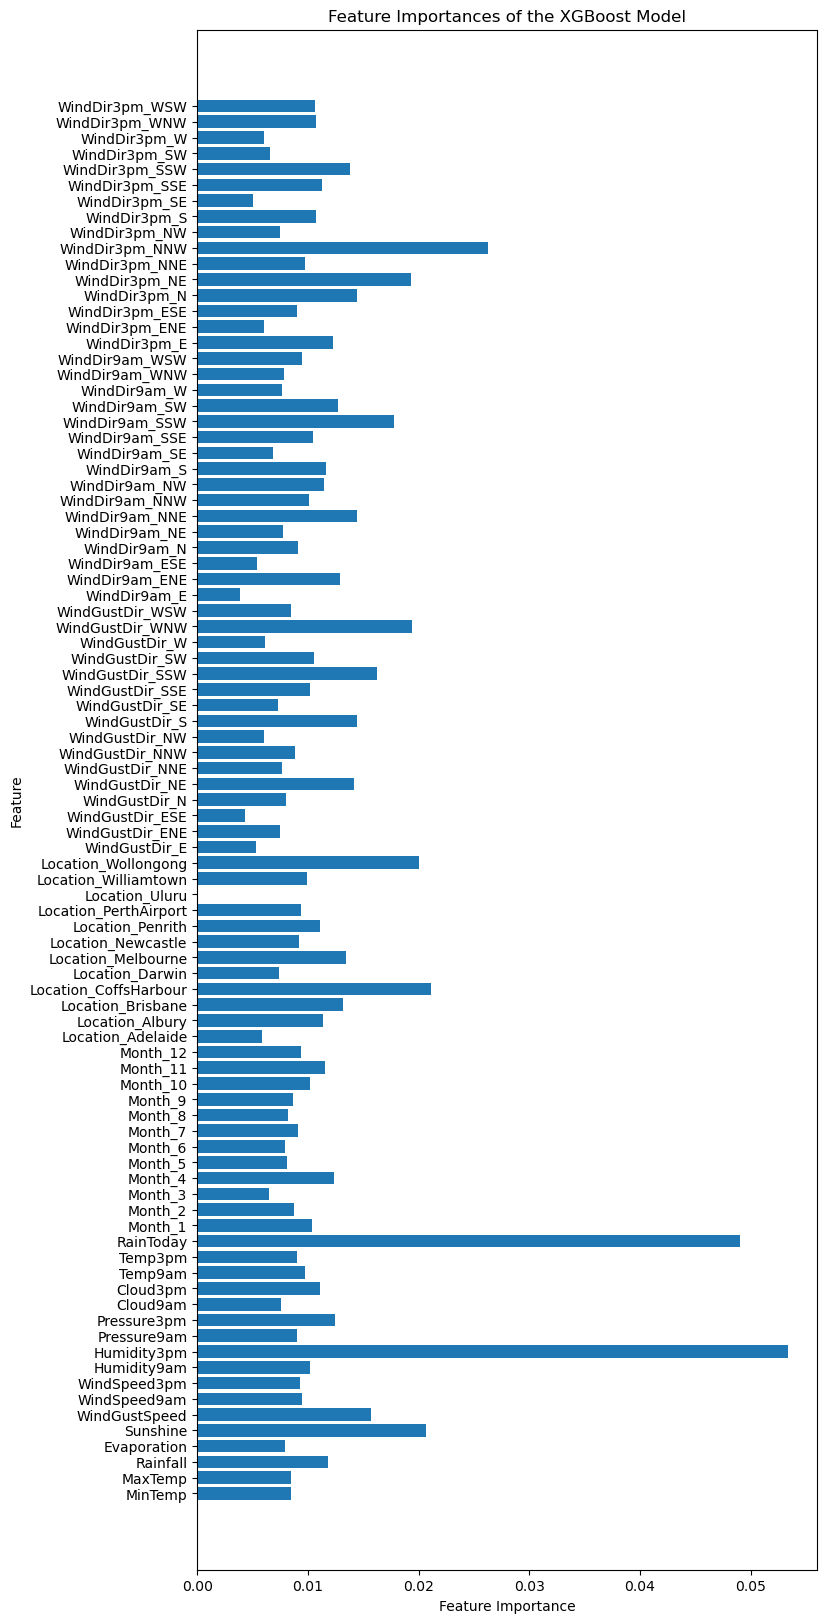

In [98]:
best_xgb = xgb_gs.best_estimator_

plt.figure(figsize=(8, 20))
plt.barh(range(best_xgb.n_features_in_), best_xgb.feature_importances_)
plt.yticks(np.arange(best_xgb.n_features_in_), X_train.columns.values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of the XGBoost Model');

In [100]:
feat_imp_df = pd.DataFrame(data={'Feature': r_df_final.columns.drop('RainTomorrow'),
                                 'Importance': best_xgb.feature_importances_
                                }
                           )
feat_imp_df['Group'] = feat_imp_df.Feature.apply(lambda x: x.split('_')[0])
feat_imp_df

,Feature,Importance,Group
0,MinTemp,0.008445,MinTemp
1,MaxTemp,0.008502,MaxTemp
2,Rainfall,0.011838,Rainfall
3,Evaporation,0.007891,Evaporation
4,Sunshine,0.020623,Sunshine
...,...,...,...
84,WindDir3pm_SSW,0.013802,WindDir3pm
85,WindDir3pm_SW,0.006568,WindDir3pm
86,WindDir3pm_W,0.005993,WindDir3pm
87,WindDir3pm_WNW,0.010769,WindDir3pm


In [101]:
feat_imp_df.Group.value_counts()

Group
WindDir3pm       16
WindDir9am       16
WindGustDir      16
Location         12
Month            12
MaxTemp           1
RainToday         1
Temp3pm           1
Temp9am           1
Cloud3pm          1
Cloud9am          1
MinTemp           1
Pressure9am       1
Humidity3pm       1
Humidity9am       1
WindSpeed3pm      1
WindSpeed9am      1
WindGustSpeed     1
Sunshine          1
Evaporation       1
Rainfall          1
Pressure3pm       1
Name: count, dtype: int64

In [102]:
feat_imp_df_grouped = feat_imp_df.groupby(by='Group').sum()
feat_imp_df_grouped.sort_values('Importance', ascending=False, inplace=True)
feat_imp_df_grouped

,Feature,Importance
Group,,
WindDir3pm,WindDir3pm_EWindDir3pm_ENEWindDir3pm_ESEWindDi...,0.179518
WindDir9am,WindDir9am_EWindDir9am_ENEWindDir9am_ESEWindDi...,0.159449
WindGustDir,WindGustDir_EWindGustDir_ENEWindGustDir_ESEWin...,0.154642
Location,Location_AdelaideLocation_AlburyLocation_Brisb...,0.131991
Month,Month_1Month_2Month_3Month_4Month_5Month_6Mont...,0.111232
Humidity3pm,Humidity3pm,0.053323
RainToday,RainToday,0.049002
Sunshine,Sunshine,0.020623
WindGustSpeed,WindGustSpeed,0.015674


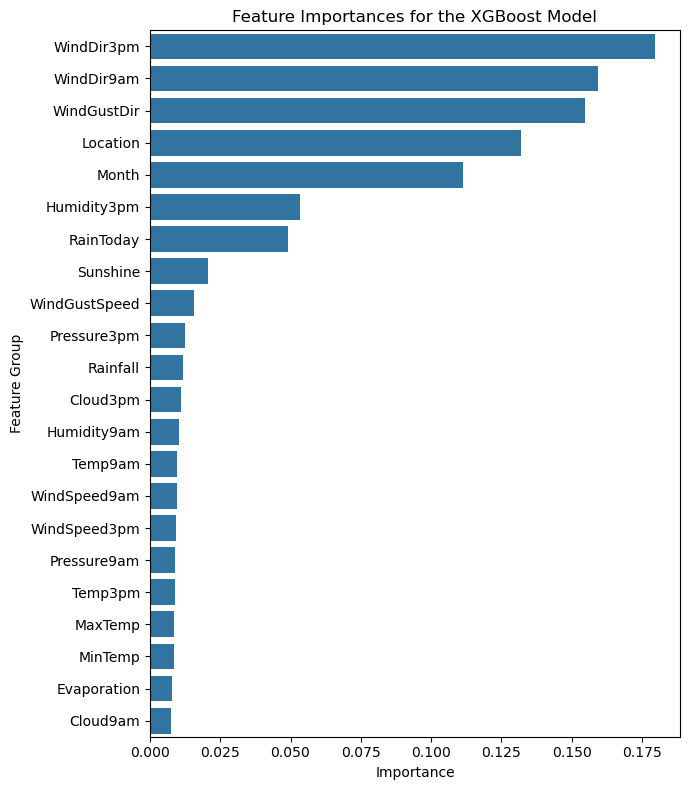

In [103]:
plt.figure(figsize=(7, 8))
sns.barplot(y=feat_imp_df_grouped.index,
            x=feat_imp_df_grouped.Importance,
            orient='h',
            color=sns.color_palette()[0]
           )
plt.title('Feature Importances for the XGBoost Model')
plt.ylabel('Feature Group')
plt.xlabel('Importance')
plt.tight_layout()

### Model Comparision

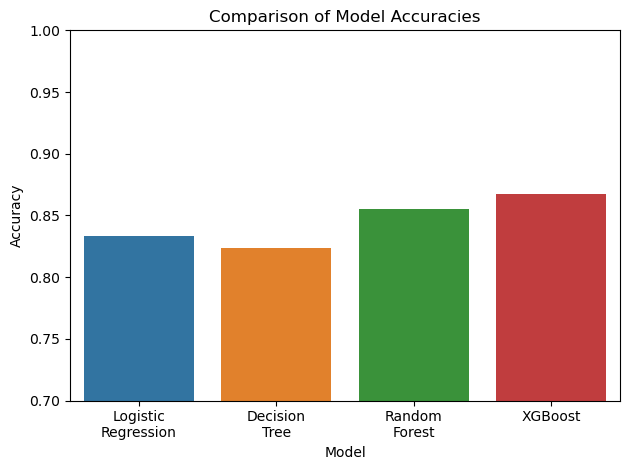

In [105]:
models = [logreg_gs, clf_gs, rf_gs, xgb_gs]

sns.barplot(x=['Logistic\nRegression', 'Decision\nTree', 'Random\nForest', 'XGBoost'],
            y=[model.best_score_ for model in models]
           )
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.title('Comparison of Model Accuracies')
plt.tight_layout()